# Importing library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('university.xlsx')
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
df.shape

(777, 18)

In [4]:
df.columns.values

array(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'], dtype=object)

# Exploratory Data Analysis
with descriptive analysis and data presentation

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


In [6]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


In [7]:
df.Private.value_counts()

Yes    565
No     212
Name: Private, dtype: int64

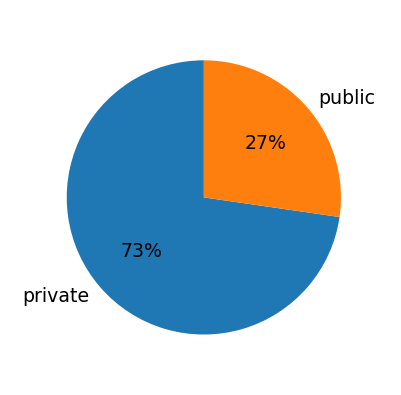

In [8]:
amount_of_private = df.Private.value_counts()['Yes']
amount_of_public = df.Private.value_counts()['No']
category_names = ['private', 'public']
sizes = [amount_of_private, amount_of_public]

plt.figure(figsize=(2, 2), dpi=227)
plt.pie(sizes, labels=category_names, textprops={'fontsize': 6}, startangle=90, 
       autopct='%1.0f%%')
plt.show()

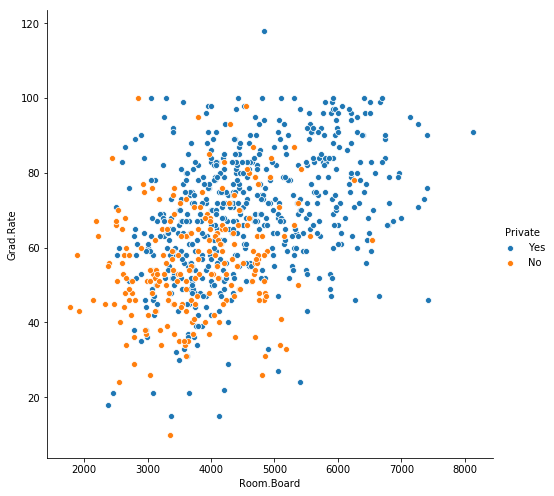

In [9]:
sns.pairplot(x_vars=["Room.Board"], y_vars=["Grad.Rate"], data=df, hue="Private", height=7)

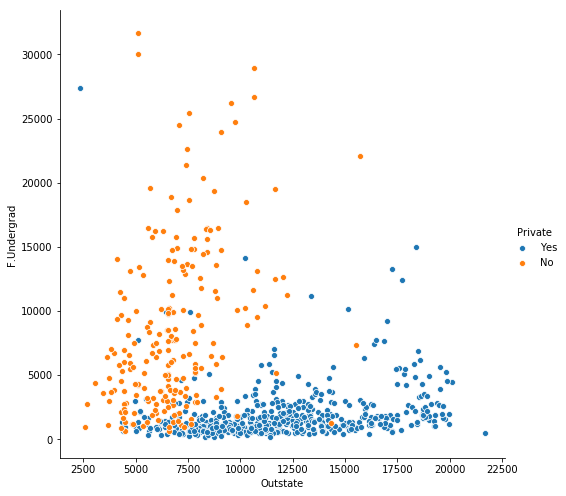

In [10]:
sns.pairplot(x_vars=["Outstate"], y_vars=["F.Undergrad"], data=df, hue="Private", height=7)

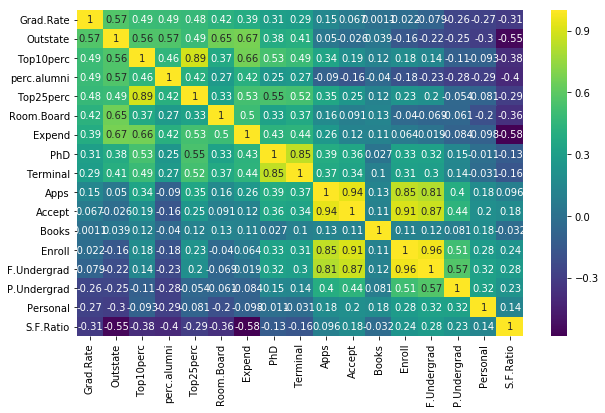

In [11]:
#Quality correlation matrix
k = 18 #number of variables for heatmap
cols = df.corr().nlargest(k, 'Grad.Rate')['Grad.Rate'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [12]:
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()



To check pairwise joint distribution of numeric data


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


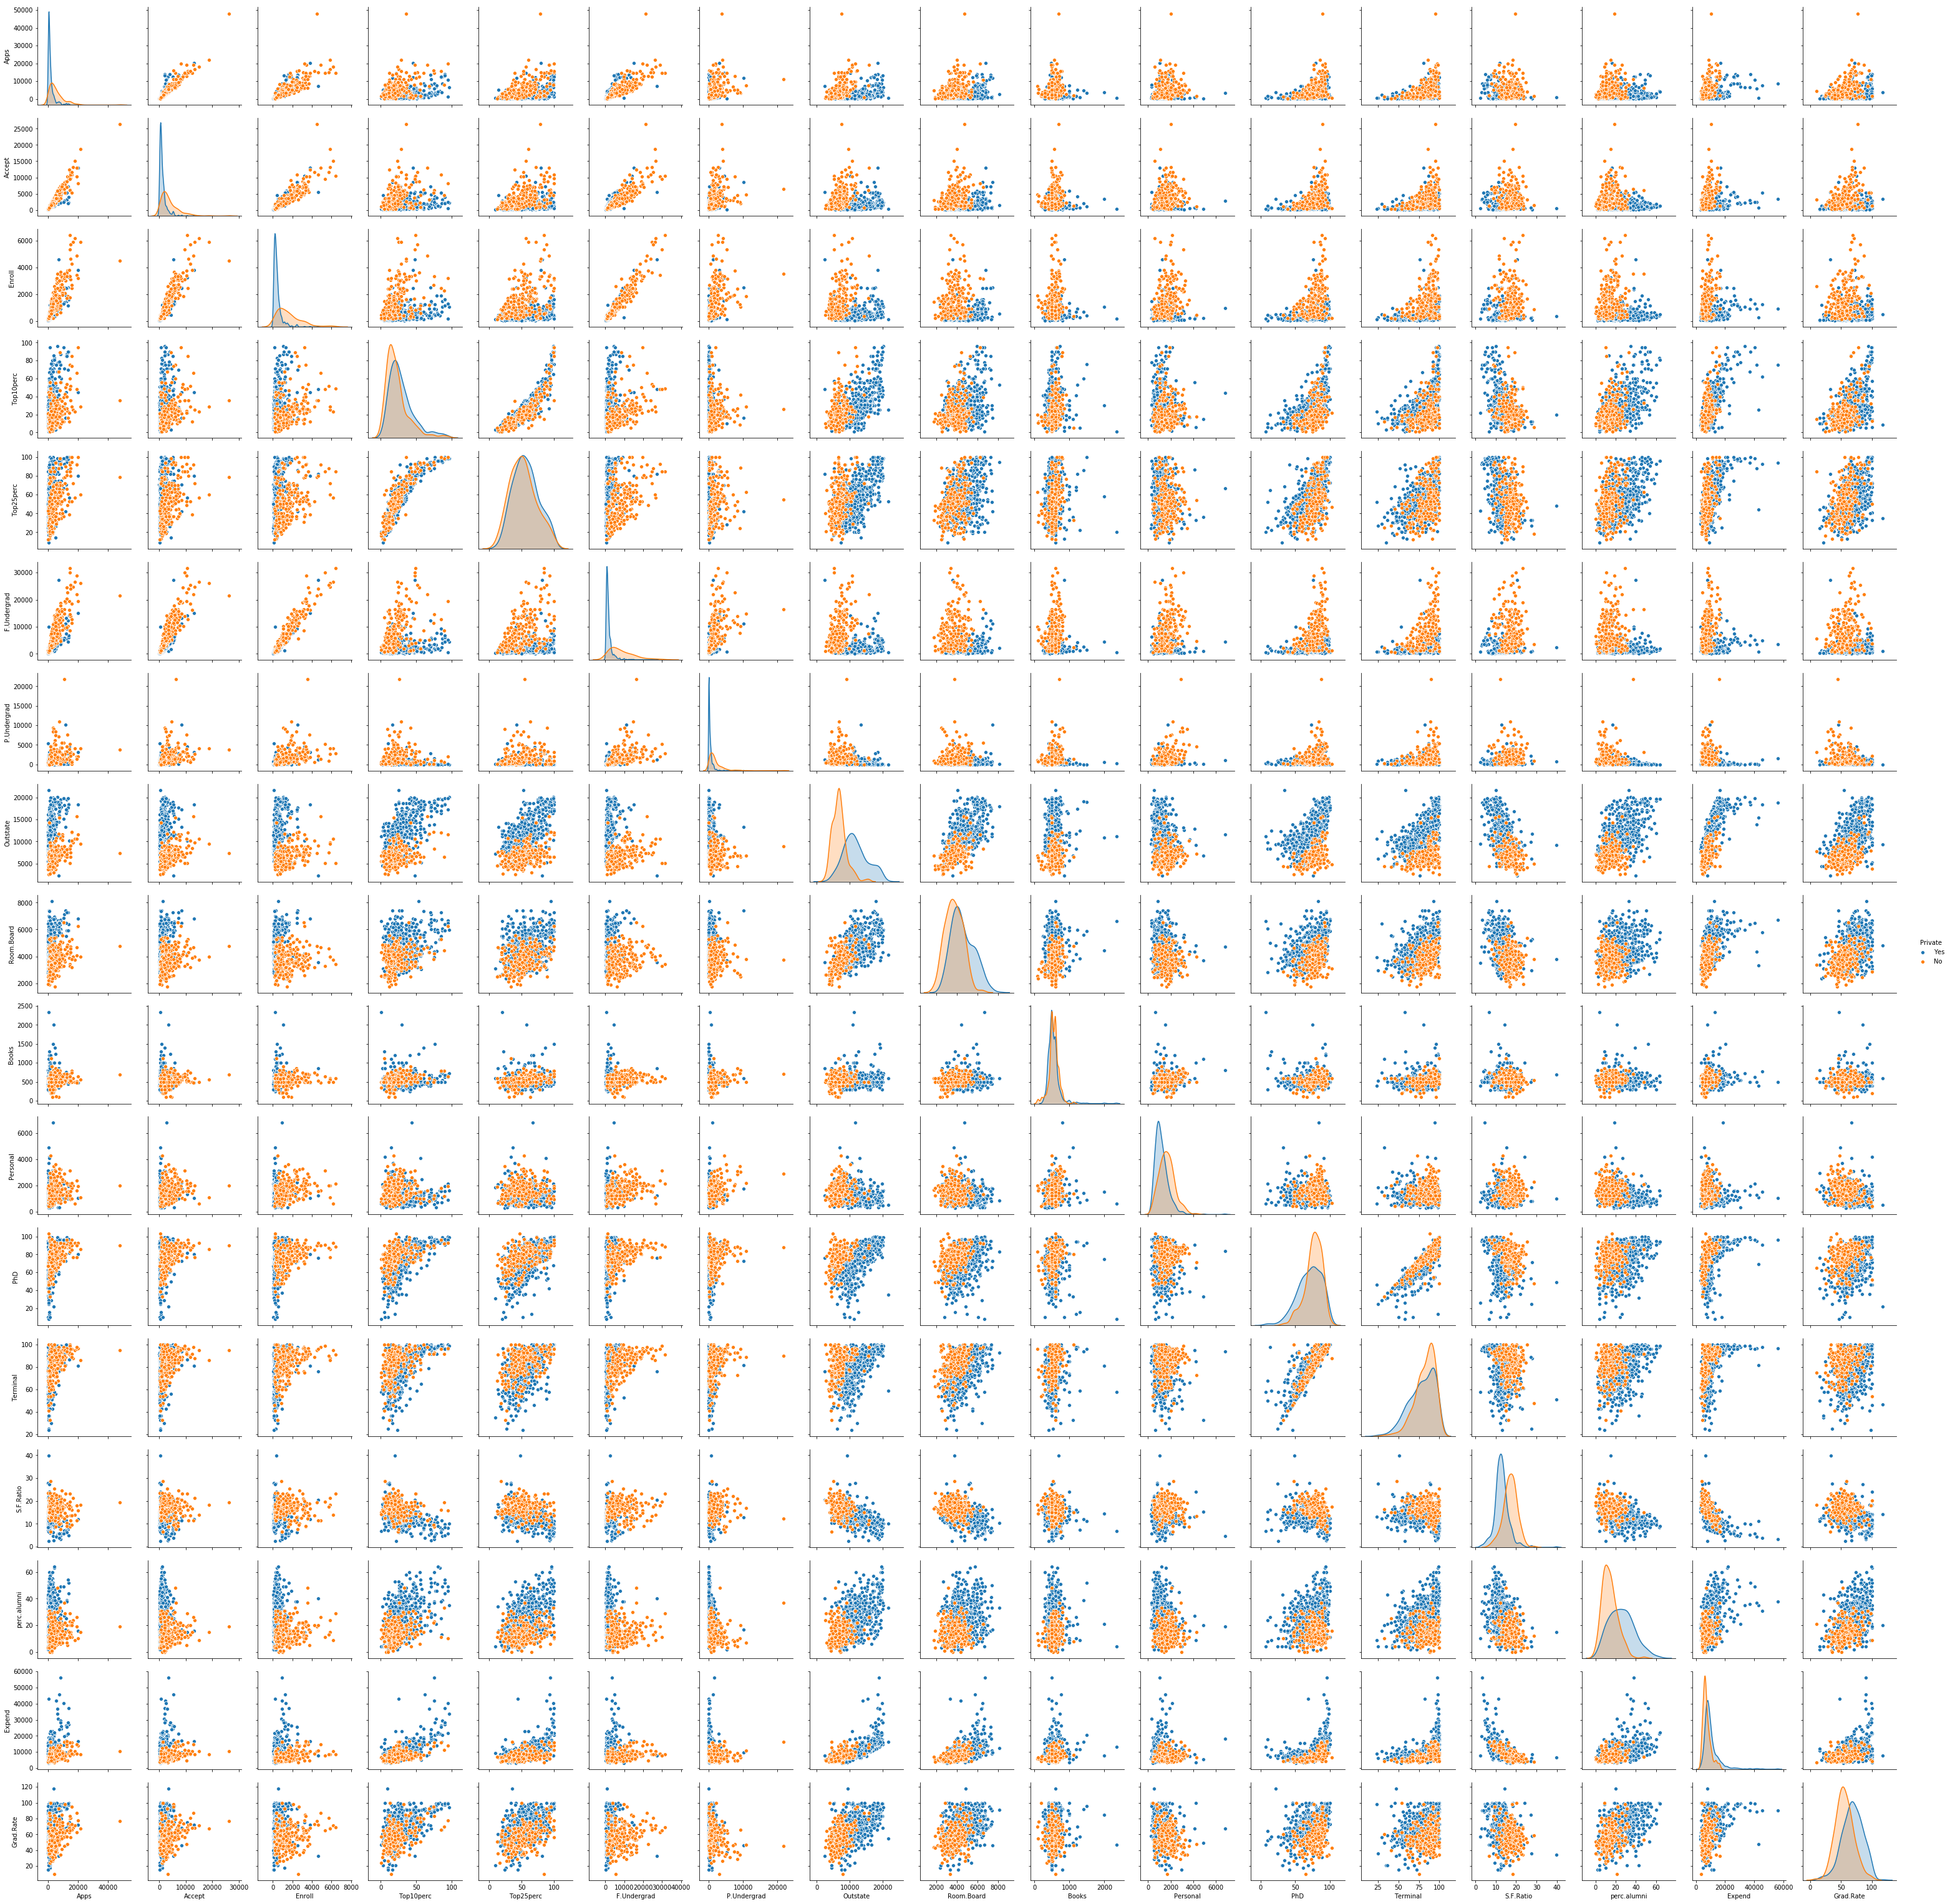

In [13]:
numeric_eda(df, hue='Private')

# Try to simply 2D
dengan mencari variabel yang paling berpengaruh terhadap label kemudian menghitung jumlah SSE nya

In [16]:
index_len = len(df.columns)
from sklearn.cluster import KMeans
wcss = []
for i in range (1, index_len):
    X = df.iloc[:, [8, i]].values
    kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
        
wcss

[15630130151.94788,
 8772514790.308805,
 4773050461.304607,
 4113676484.8477907,
 4113740960.3112783,
 16771636290.448505,
 5825342224.572247,
 8226987239.1886215,
 4754183955.532826,
 4134628411.3618193,
 4447364006.422266,
 4113666609.7504983,
 4113631087.9840794,
 4113503738.1612663,
 4113588532.708585,
 16376329922.14865,
 4113668172.53039]

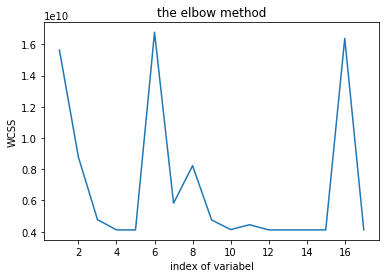

In [17]:
plt.plot(range(1, index_len), wcss)
plt.title('the elbow method')
plt.xlabel('index of variabel')
plt.ylabel('WCSS')
plt.show()

In [18]:
df.columns.values

array(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'], dtype=object)

# K-Means Multivariable

In [19]:
X = df.iloc[:, range(1,18)].values
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [20]:
kmeans.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.51195815e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

In [21]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [22]:
df['Cluster'] = kmeans.labels_

In [23]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0


In [24]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

df['Private'].replace(to_replace ="Yes", value = 0, inplace=True)
df['Private'].replace(to_replace ="No", value = 1, inplace=True)

y_true = df.Private # label data
y_pred = df.Cluster # hasil klastering
print(confusion_matrix(y_true, y_pred))

[[531  34]
 [138  74]]


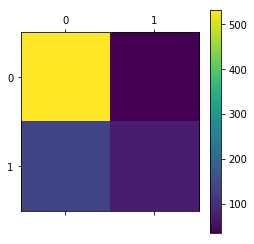

In [25]:
cm = metrics.confusion_matrix(y_true, y_pred)
plt.matshow(cm)
plt.colorbar()
plt.show()

In [26]:
print(metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       565
           1       0.69      0.35      0.46       212

   micro avg       0.78      0.78      0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



In [27]:
print(metrics.accuracy_score(y_true, y_pred))

0.7786357786357786


# Optimal Cluster with elbow method

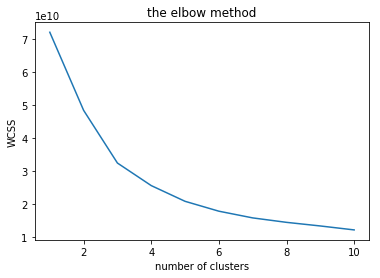

In [34]:
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [33]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

y_kmeans

array([0, 4, 0, 4, 0, 0, 0, 4, 4, 0, 4, 4, 0, 0, 0, 0, 4, 0, 0, 3, 1, 3,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 3, 0, 0, 0, 0,
       4, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 4, 2, 4, 0, 4, 0,
       0, 0, 0, 2, 1, 4, 4, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 4, 1,
       0, 0, 0, 4, 0, 0, 4, 0, 4, 0, 0, 0, 4, 0, 3, 3, 3, 0, 4, 4, 4, 0,
       0, 0, 0, 0, 4, 4, 0, 4, 3, 0, 4, 0, 4, 4, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 3, 4, 4, 2, 0, 0, 1, 0, 0, 0, 0, 4, 0, 4, 4, 0,
       0, 0, 0, 0, 1, 4, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 4, 4, 0, 1, 4,
       2, 3, 0, 0, 0, 3, 0, 0, 4, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0,
       0, 0, 0, 3, 0, 2, 0, 4, 3, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 4,
       0, 4, 3, 3, 0, 4, 0, 0, 0, 0, 4, 0, 0, 3, 0, 0, 0, 4, 0, 0, 4, 0,
       4, 4, 4, 3, 0, 0, 0, 4, 1, 4, 0, 0, 4, 4, 4, 3, 4, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 2, 4, 0, 0, 3, 2, 0, 0, 2, 4, 3, 3, 3, 0, 0, 1, 0,
       0, 4, 3, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 4, 0,